In [91]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torch.nn.functional as F # functions

from torch.optim import SGD

import numpy as np

# 1 Network
Networks are defined as a class and then an implementation in an instance called `model`

In [18]:
class myNet(nn.Module):
    def __init__(self): # defines parameters
        super(myNet, self).__init__() # uses the init of the parent class `nn`
        # requires_grad specifies is its trainable
        # tensor provide automatic differentiation
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad= False) 
        self.w01 = nn.Parameter(torch.tensor(-12.6), requires_grad= False) 
        self.b00 = nn.Parameter(torch.tensor(1), requires_grad= False)
        self.b01 = nn.Parameter(torch.tensor(5), requires_grad= False)

        self.w10 = nn.Parameter(torch.tensor(3.7), requires_grad= False) 
        self.w11 = nn.Parameter(torch.tensor(-15.7), requires_grad= False)
        self.b10 = nn.Parameter(torch.tensor(3), requires_grad= False)
        self.b11 = nn.Parameter(torch.tensor(-4), requires_grad= False)

    
    def forward(self, input): # defines the workings
        # connection input to two neurons
        input_to_00 = input * self.w00 + self.b00
        output_00   = F.tanh(input_to_00) 

        input_to_01 = input * self.w01 + self.b01
        output_01   = F.tanh(input_to_01)

        # connection two neurons to final output
        scaled_10   = output_00 * self.w10 + self.b10
        scaled_11   = output_01 * self.w11 + self.b11

        final_output= scaled_10 + scaled_11

        return final_output


In [19]:
# array of inputs as a tensor
input_array = torch.linspace(start=0, end=1, steps=20)

input_array

tensor([0.0000, 0.0526, 0.1053, 0.1579, 0.2105, 0.2632, 0.3158, 0.3684, 0.4211,
        0.4737, 0.5263, 0.5789, 0.6316, 0.6842, 0.7368, 0.7895, 0.8421, 0.8947,
        0.9474, 1.0000])

In [20]:
# instance the model
model = myNet()

output_hat = model(input_array)

output_hat

tensor([-13.8807, -13.7469, -13.6194, -13.4665, -13.1747, -12.3423,  -9.7208,
         -2.9662,   7.1173,  14.2489,  17.0791,  17.9470,  18.2004,  18.2810,
         18.3132,  18.3307,  18.3428,  18.3524,  18.3602,  18.3667])

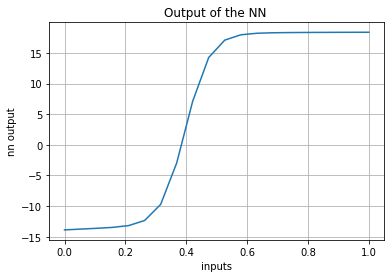

In [26]:
plt.plot(input_array, output_hat)
plt.grid()
plt.xlabel('inputs')
plt.ylabel('nn output')
plt.title('Output of the NN ')
plt.show()

# Trainable Network


In [109]:
class myNet_train(nn.Module):
    def __init__(self): # defines parameters
        super(myNet_train, self).__init__() # uses the init of the parent class `nn`
        # requires_grad specifies is its trainable
        # tensor provide automatic differentiation
        self.w00 = nn.Parameter(torch.tensor(10.7), requires_grad= True) 
        self.w01 = nn.Parameter(torch.tensor(12.6), requires_grad= True) 
        self.b00 = nn.Parameter(torch.tensor(10.), requires_grad= True)
        self.b01 = nn.Parameter(torch.tensor(5.), requires_grad= True)

        self.w10 = nn.Parameter(torch.tensor(3.7), requires_grad= True) 
        self.w11 = nn.Parameter(torch.tensor(15.7), requires_grad= True)
        self.b10 = nn.Parameter(torch.tensor(3.), requires_grad= True)
        self.b11 = nn.Parameter(torch.tensor(-4.), requires_grad= True)


    
    def forward(self, input): # defines the workings
        # connection input to two neurons
        input_to_00 = input * self.w00 + self.b00
        output_00   = F.relu(input_to_00) 

        input_to_01 = input * self.w01 + self.b01
        output_01   = F.relu(input_to_01)

        # connection two neurons to final output
        scaled_10   = output_00 * self.w10 + self.b10
        scaled_11   = output_01 * self.w11 + self.b11

        final_output= scaled_10 + scaled_11

        return final_output

In [113]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

model1 = myNet_train()

output_hat = model1(input_array)
output_hat.detach() # necessary this to separate, to be able to graph

tensor([114.5000, 126.9953, 139.4905, 151.9858, 164.4810, 176.9763, 189.4716,
        201.9668, 214.4621, 226.9574, 239.4526, 251.9479, 264.4432, 276.9384,
        289.4337, 301.9290, 314.4242, 326.9195, 339.4148, 351.9100])

optimizacion, 

In [116]:
optimizer = SGD(model1.parameters(), lr=0.1)

last_loss = 0
for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model1(input_i)

        loss = (output_i - label_i)**2    # L2 Norma
        loss.backward() # applies backward prop

        total_loss += float(loss)
        
    if (total_loss < 0.1):
        print("Num steps: ", epoch)
        break

    if ( np.abs(total_loss - last_loss) < 0.01):
        print(total_loss)
        print("close to min, num steps: ", epoch)
        break


    optimizer.step()
    optimizer.zero_grad()

    last_loss = total_loss

0.6667426228523254
close to min, num steps:  1


In [118]:
outputs_hat = model1(inputs)

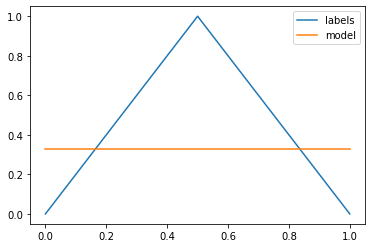

In [122]:
plt.plot(inputs, labels, label="labels")
plt.plot(inputs, outputs_hat.detach(), label="model")
plt.legend()
plt.show()